From Yusen Rong


# DATA 550 - Lab 2 - EDA on movie data

In this lab we will be using both R and Python,
and for each question you will develop an answer both in `ggplot` and in `Altair`.
Although the `%%R` cell magic makes it convenient for us to do this in the same notebook,
I would still recommend that you use a separate Jupyter Notebook with a dedicated R kernel
or RStudio to develop your R code.
The reasons for this are that autocompletion works better there
and the error messages are easier to understand.
Once you have developed the code for a question
you can paste it into the corresponding R cell here
and make sure it runs and shows up in the exported HTML.

If your `rpy2` does not work,
you can paste in entire cells from an R-kernel including the output plots,
or you can submit a different notebook on GitHub for the R part,
but you must write this in the canvas comments
or next to your repo link in this notebook so that the TAs know when they grade.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Create a GitHub Repo for your group.
      <ul>
          <li>Keep this organized, i.e. with a separate clearly marked folder for each assignment.</li>
    </ul>
  </li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>

  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/folder_path/DATA_550_labX_groupY.</li>
    </ul>
  </li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`</li>
      <li> Convert your notebook to .html format using `File -> Save and Export Notebook As -> HTML`</li>
      <li> Submit and double check that your have submitted the correct file to Canvas </li>
    </ul>
  </li>
</ul>
</div>

https://github.com/Manpreet702/DataViz_550.git

In [4]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')
!pip install "vegafusion[embed]>=1.5.0" # Install vegafusion if not already installed or outdated
!pip install "vl-convert-python>=1.6.0"
alt.data_transformers.enable("vegafusion")

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# 0. Get motivated!

I have heard that the movie market is a lucrative business,
and have been looking into starting my own online streaming service
together with a few friends.
Before we do this,
we need to understand the movie market better so that we can get a competitive edge
over existing service.
I have been looking all over for an aspiring data wrangler and future VIZARD,
but haven't been able to track one down.
This is where you come in!

![image.png](attachment:251434e1-4881-4db3-815c-bbaa0a85129a.png)

Together,
we must understand the current movie market,
which companies produces what kind of movies,
and which receive good scores.
Then we can have the best movies on our platform and show only those, easy right?
I mean...we will show only good movies, I can't believe no one has thought of this before!
I have already identified a unique name for this service: Bestflix™.

![image.png](attachment:fecdc3eb-6794-4b74-8458-88bea4b86c71.png)

Don't worry,
we're in this together and I will be helping you with the wrangling throughout most exercises
if you take charge of the viz part, deal?.
Also,
I have never failed to start a company before,
so you're in good hands.
I can already smell the `$$$`,
so let's get started!

In this notebook,
we will focus on Exploratory Data Analysis (EDA),
both for single numerical columns, pairwise numerical columns,
numerical columns conditioned on categorical columns and combinations of categorical columns.

# 1. Single numerical columns

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,accuracy:1}

<h4>Python</h4>
<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot.  Download the file <code>lab2-movies.json</code> from the course GitHub to your computer, and then read it in using pandas. Using dataframe methods, do the following in three different cells:</p>
<ol>
<li>Display the first few and last few rows of the data.</li>
<li>Display info about all columns, data types, and number of NaN values.</li>
<li>Display a summary description of the data frame's numerical columns.</li>
</ol>

</div>

In [5]:
# YOUR ANSWER GOES HERE
import pandas as pd
df_movie=pd.read_json('/content/lab2-movies.json')
df_movie.head()

,id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
0,12,Finding Nemo,100,94000000,940335536,3.86,33887,[Animation],[Pixar Animation Studios]
1,13,Forrest Gump,142,55000000,677945399,4.05,91921,"[Romance, Comedy, Drama]",[Paramount Pictures]
2,14,American Beauty,122,15000000,356296601,4.13,57879,[Drama],[DreamWorks SKG]
3,16,Dancer in the Dark,140,12800000,40031879,3.84,4571,[Drama],[Canal+]
4,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,3.81,36337,[Action],[Walt Disney Pictures]


In [6]:
# YOUR ANSWER GOES HERE
df_movie.info()
print(df_movie.isna().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1008 non-null   int64  
 1   title         1008 non-null   object 
 2   runtime       1008 non-null   int64  
 3   budget        1008 non-null   int64  
 4   revenue       1008 non-null   int64  
 5   vote_average  1008 non-null   float64
 6   vote_count    1008 non-null   int64  
 7   genres        1008 non-null   object 
 8   studios       1008 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 78.8+ KB
id              0
title           0
runtime         0
budget          0
revenue         0
vote_average    0
vote_count      0
genres          0
studios         0
dtype: int64


In [7]:
# YOUR ANSWER GOES HERE
df_movie.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
id,1008.0,4.988870e+04,8.832596e+04,12.00,3.627000e+03,1.043250e+04,4.465875e+04,4.176440e+05
runtime,1008.0,1.121835e+02,2.152773e+01,63.00,9.600000e+01,1.080000e+02,1.250000e+02,2.020000e+02
budget,1008.0,5.940012e+07,5.525947e+07,5.00,2.000000e+07,4.000000e+07,8.000000e+07,3.800000e+08
revenue,1008.0,1.878759e+08,2.449621e+08,85.00,4.127994e+07,1.018510e+08,2.270864e+08,2.787965e+09
vote_average,1008.0,3.240198e+00,4.719189e-01,1.61,2.947500e+00,3.265000e+00,3.590000e+00,4.430000e+00
vote_count,1008.0,6.907057e+03,1.079434e+04,11.00,8.570000e+02,2.688000e+03,8.774000e+03,9.192100e+04


<div class="alert alert-success" style="color:black">

### Question 1.2
rubric={reasoning:1,accuracy:1}

<h4>R</h4>
<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot. Download the file <code>lab2-movies.json</code> from the course GitHub to your computer, and then run the code for reading in the data that I have provided below. Then do the following in three different cells:</p>
    
<ol>
<li>Display the first few rows of the data.</li>
<li>Display info about all columns, including their data types.</li>
<li>Display a summary description of the data frame's numerical columns only.</li>
</ol>

</div>

In [8]:
%%R
install.packages("rjson") # Install the rjson package
library(rjson)
library(tidyverse)
movies <- fromJSON(file = '/content/lab2-movies.json') %>%
    as_tibble() %>%
    unnest(-c(studios, genres))


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/rjson_0.2.23.tar.gz'
Content type 'application/x-gzip' length 79159 bytes (77 KB)
downloaded 77 KB


The downloaded source packages are in
	‘/tmp/RtmpH5vhtR/downloaded_packages’


In [9]:
# YOUR ANSWER GOES HERE
%%R
head(movies)

# A tibble: 6 × 9
     id title      runtime budget revenue vote_average vote_count genres studios
  <dbl> <chr>        <dbl>  <dbl>   <dbl>        <dbl>      <dbl> <name> <named>
1    12 Finding N…     100 9.40e7  9.40e8         3.86      33887 <chr>  <chr>  
2    13 Forrest G…     142 5.50e7  6.78e8         4.05      91921 <chr>  <chr>  
3    14 American …     122 1.5 e7  3.56e8         4.13      57879 <chr>  <chr>  
4    16 Dancer in…     140 1.28e7  4.00e7         3.84       4571 <chr>  <chr>  
5    22 Pirates o…     143 1.4 e8  6.55e8         3.81      36337 <chr>  <chr>  
6    58 Pirates o…     151 2   e8  1.07e9         3.47      15079 <chr>  <chr>  


In [10]:
%%R
# YOUR ANSWER GOES HERE
glimpse(movies)

Rows: 1,008
Columns: 9
$ id           <dbl> 12, 13, 14, 16, 22, 58, 59, 70, 73, 74, 76, 78, 85, 87, 8…
$ title        <chr> "Finding Nemo", "Forrest Gump", "American Beauty", "Dance…
$ runtime      <dbl> 100, 142, 122, 140, 143, 151, 96, 132, 119, 116, 105, 117…
$ budget       <dbl> 9.40e+07, 5.50e+07, 1.50e+07, 1.28e+07, 1.40e+08, 2.00e+0…
$ revenue      <dbl> 940335536, 677945399, 356296601, 40031879, 655011224, 106…
$ vote_average <dbl> 3.86, 4.05, 4.13, 3.84, 3.81, 3.47, 3.63, 3.84, 4.15, 3.1…
$ vote_count   <dbl> 33887, 91921, 57879, 4571, 36337, 15079, 5082, 13901, 318…
$ genres       <named list> "Animation", <"Romance", "Comedy", "Drama">, "Dram…
$ studios      <named list> "Pixar Animation Studios", "Paramount Pictures", "…


In [11]:
%%R
# YOUR ANSWER GOES HERE
movies %>%
  select(where(is.numeric)) %>%
  select(-id) %>%
  summary()

    runtime          budget            revenue           vote_average  
 Min.   : 63.0   Min.   :5.00e+00   Min.   :8.500e+01   Min.   :1.610  
 1st Qu.: 96.0   1st Qu.:2.00e+07   1st Qu.:4.128e+07   1st Qu.:2.947  
 Median :108.0   Median :4.00e+07   Median :1.019e+08   Median :3.265  
 Mean   :112.2   Mean   :5.94e+07   Mean   :1.879e+08   Mean   :3.240  
 3rd Qu.:125.0   3rd Qu.:8.00e+07   3rd Qu.:2.271e+08   3rd Qu.:3.590  
 Max.   :202.0   Max.   :3.80e+08   Max.   :2.788e+09   Max.   :4.430  
   vote_count   
 Min.   :   11  
 1st Qu.:  857  
 Median : 2688  
 Mean   : 6907  
 3rd Qu.: 8774  
 Max.   :91921  


<div class="alert alert-info" style="color:black">

### Question 1.3
rubric={viz:1,accuracy:1}

<h4>Python</h4>
<p>Create a single histogram of a numerical column of your choice, choosing an appropriate number of bins and set the figure height to 100.</p>

</div>

In [36]:
# YOUR ANSWER GOES HERE
print(df_movie.columns)
column = 'budget'

hist=alt.Chart(df_movie).mark_bar().encode(
    alt.X(column,bin=alt.Bin(maxbins=150)),
    alt.Y('count()')
).properties(height=100)

hist

Index(['id', 'title', 'runtime', 'budget', 'revenue', 'vote_average',
       'vote_count', 'genres', 'studios'],
      dtype='object')


alt.Chart(...)

In [35]:
#import altair as alt
alt.renderers.enable("html")

RendererRegistry.enable('html')

<div class="alert alert-success" style="color:black">

### Question 1.4
rubric={viz:1,accuracy:1,reasoning:1}

<h4>R</h4>
<ol type="1">
<li><p>Create a single density estimate of a numerical column of your choice by using he density geom.</p></li>
<li><p>Try setting the <code>alpha</code> parameter to a float between 0 and 1 and the <code>fill</code> parameter to a color name as a string to get a shaded density, which I find visually appealing =) Set these inside the geom, not inside the aes function.</p></li>
<li><p>Do you think either of this density plot or the histogram in the previous exercise gives you a better understanding of the underlying data? Which one and why?</p></li>
</ol>


</div>

Between the density plot and the histogram, the density plot is often better for comparing overall *shape* (skew, multimodality) because it’s smooth and less sensitive to bin choices. The histogram is better when you care about *counts per bin* and want a more literal “how many movies fall here” view. With enough data, density is cleaner for shape; histogram is more concrete for frequency.


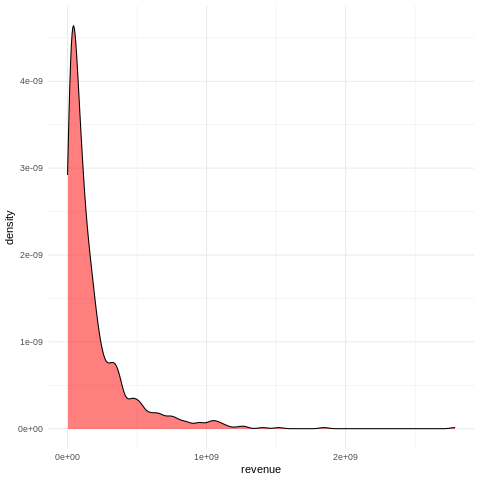

In [14]:
%%R
# YOUR ANSWER GOES HERE
movies%>%
  ggplot(aes(x=revenue)) +
  geom_density(alpha=0.5, fill='red') +
  theme_minimal()

<div class="alert alert-info" style="color:black">

### Question 1.5
rubric={viz:2,accuracy:2}
    
<h4>Python</h4>
<ul>
    <li>Extract the column names from all numerical columns except <code>id</code> and save them to a variable as a list (the <code>.select_dtypes()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your histogram above and paste it here. Modify the code so it plots one histogram per numeric column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use the Altair approach to repeating charts instead (with the `repeat` keyword` rather than <code>row</code> or <codecolumn`).</li>
</ul>

</div>

In [37]:
# YOUR ANSWER GOES HERE
numeric_cols=df_movie.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('id')

alt.Chart(df_movie).mark_bar().encode(
    x=alt.X(alt.repeat("repeat"),type='quantitative',bin=alt.Bin(maxbins=150)),
    y=alt.Y('count():Q')

).properties(height=100,width=250).repeat(repeat=numeric_cols,columns=2)

alt.RepeatChart(...)

<div class="alert alert-success" style="color:black">

### Question 1.6
rubric={viz:2,accuracy:2}
    
<h4>R</h4>
<ul>
    <li>Pipe the data fame's numerical columns (except <code>id</code>) into ggplot (the <code>.select_if()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your density plot above and paste it here. Modify the code so that it accepts the piped dataframe and plots one density estimate per column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use pivoting and faceting instead (example in the lecture videos).</li>
</ul>

</div>

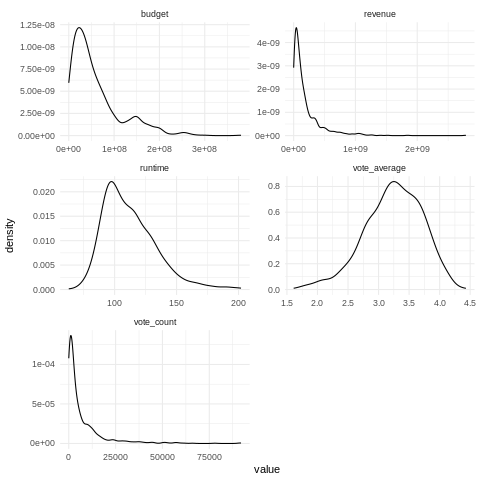

In [16]:
%%R
# YOUR ANSWER GOES HERE
movies %>%
  select(where(is.numeric)) %>%
  select(-id) %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value") %>%
  ggplot(aes(x = value)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~ variable, ncol = 2, scales = "free") +
  theme_minimal()

# 2. Pairwise numerical columns

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={viz:2,accuracy:2}
    
<h4>Python</h4>

<p>Next, let’s look at the relationships between pairs of numerical columns.For this we will create a scatterplot matrix (SPLOM) for all numerical columns except id.</p>
<ol type="1">
<li>I recommend starting with creating a single scatter plot and gradually substituting in the repeating columns.</li>
<li>Do not include zero on either axis unless the data actually starts at zero.</li>
<li>Reduce each subplots height and width to be able to see the entire lower diagonal in view.</li>
<li>Set the opacity and size of the points directly inside <code>mark_point()</code> in order for the plots to appear less saturated.</li>
<li>Configure the axes to remove or shrink the font of the axes labels (and optional reduce the axes titles' size). Plots don't have to look perfect during EDA, the point here is to pick up trends, not necessarily to read all labels.</li>
</ol>

You can <a href=https://altair-viz.github.io/gallery/scatter_matrix.html> study this example if you want guidance.</a>

</div>

In [38]:
# YOUR ANSWER GOES HERE
alt.Chart(df_movie).mark_point(opacity=0.25,size=12).encode(
    x=alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y=alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False))
).properties(width=90,height=90).repeat(row=numeric_cols,column=numeric_cols).configure_axis(
    labelFontSize=10,
    titleFontSize=10)

alt.RepeatChart(...)

<div class="alert alert-success" style="color:black">

### Question 2.2
rubric={viz:1,accuracy:1}
    
<h4>R</h4>

<p>Oh cra.. I mean: DONT PANIC! Everything is under control... ok let's try the same thing in R
Create a scatterplot matrix (SPLOM) of all numerical columns except <code>id</code>.</p>
<p>There is nothing built into <code>ggplot</code> for this but the <code>GGally</code> package has a handy <code>ggpairs</code> function for this, which also plots single column densities on the diagonal and correlation coefficients on the upper corner. Install this package an then use the <code>ggpairs</code>.</p>


</div>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘patchwork’, ‘ggstats’

trying URL 'https://cran.rstudio.com/src/contrib/patchwork_1.3.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ggstats_0.12.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/GGally_2.4.0.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpH5vhtR/downloaded_packages’


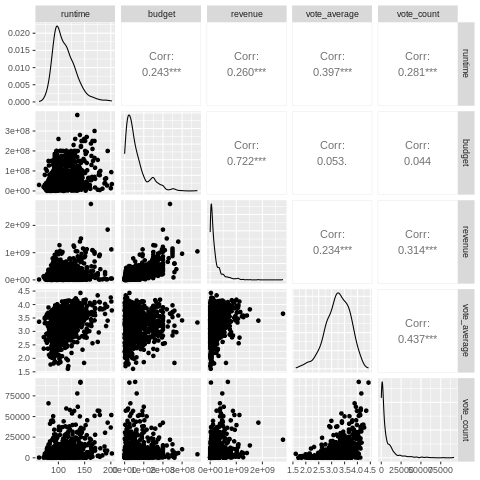

In [18]:
%%R
# YOUR ANSWER GOES HERE
install.packages("GGally") # Install the GGally package
library(GGally)

movies %>%
  select(where(is.numeric)) %>%
  select(-id) %>%
  ggpairs()

<div class="alert alert-warning" style="color:black">

### Question 2.3 (Optional)
rubric={viz:0.5,accuracy:0.5}
    
<h4>Python</h4>
<p>Another way of viewing the pairwise relationships between numerical column is to assess their correlation coefficients. It can be a good idea to use spearman instead of pearson correlation in order to pick up nonlinearities, so make sure to use that below.</p>
<p>I have done most of the wrangling, but you need to fill in the one blank and then view the dataframe to figure out how to plot it. Use some type of point plot with a marker of your choice and make an informed decision of which encoding channels to map the different data frame columns to.</p>

</div>

In [39]:
# YOUR ANSWER GOES HERE

corr_df = df_movie[numeric_cols].corr(method='spearman').stack().reset_index(name='corr')
alt.Chart(corr_df).mark_circle().encode(
    x=alt.X("level_0:N"),
    y=alt.Y("level_1:N"),
    color=alt.Color("corr:Q", scale=alt.Scale(domain=[-1, 1])),
    size=alt.Size("corr:Q", scale=alt.Scale(domain=[0, 1])),
    tooltip=["level_0:N", "level_1:N", "corr:Q"]
).properties(
    width=350,
    height=350
)


alt.Chart(...)

<div class="alert alert-warning" style="color:black">

### Question 2.4 (Optional)
rubric={accuracy:0.5,reasoning:0.5}
    
<h4>R</h4>
    
<p>We're getting close, dont give up! Remember, we're in it for the <code>$$$</code></p>

<ol type="1">
<li>There is nothing built into <code>ggplot</code> for correlations but the <code>GGally</code> package has a handy <code>ggcorr</code> function we can use. You could also calculate it manually and use <code>geom_tile</code> if you prefer.</li>
<li>Compare this to the plot you made with Altair above. Which visualization do you prefer for viewing the correlation? Briefly explain why in &lt;90 words.</li>
</ol>

</div>

I prefer the correlation heatmap when I want to scan the whole “correlation landscape” quickly and compare signs and strengths across many pairs at once. The Altair bubble plot is nice for interactive exploration (tooltips, quick hovering), but it can look busier because size and color compete for attention. For fast pattern recognition and reporting, I’d pick the heatmap; for exploratory poking around, I’d pick the interactive Altair plot.


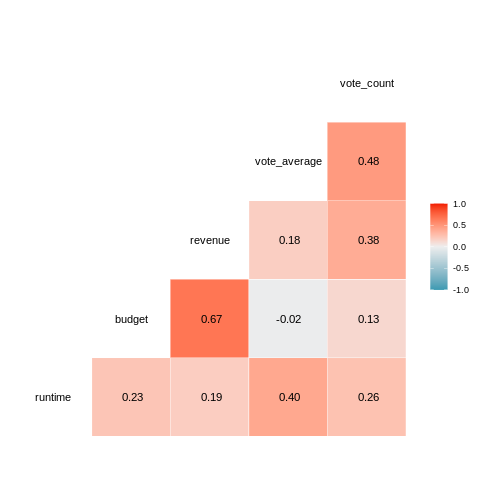

In [20]:
%%R
# YOUR ANSWER GOES HERE

movies %>%
  select(where(is.numeric)) %>%
  select(-id) %>%
  ggcorr(method = c("pairwise", "spearman"), label = TRUE, label_round = 2)


YOUR ANSWER TO #2 HERE

<div class="alert alert-warning" style="color:black">

### Question 2.5 (Optional)
rubric={viz:0.5,accuracy:0.5}
    
<h4>Python</h4>
<p>In the lecture, I mentioned hat 2D histograms is a good alternative when you scatter plots become oversaturated. Copy your code from 2.1 and change it so that we can see multiple “heatmap-like” 2D histograms instead of scatter plots.</p>

</div>

In [40]:
# YOUR ANSWER GOES HERE
alt.Chart(df_movie).mark_rect().encode(
    x=alt.X(alt.repeat("column"), type="quantitative", bin=alt.Bin(maxbins=15), scale=alt.Scale(zero=False)),
    y=alt.Y(alt.repeat("row"), type="quantitative", bin=alt.Bin(maxbins=15), scale=alt.Scale(zero=False)),
    color=alt.Color("count():Q")
).properties(
    width=90,
    height=90
).repeat(
    row=numeric_cols,
    column=numeric_cols
)

alt.RepeatChart(...)

# 3. EDA of numerical columns conditioned on a categorical column (genres)

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={viz:1,accuracy:1}

<h4>Python</h4>
<p>Lots of interesting variation in the histograms above! I wonder if some of it can be explained by movie genre or which studio made the film… This could be valuable information for Bestify™ so let’s find out!</p>
<p>We’ll start with the movie genres. If you look at the data frame, you can see that each film has multiple genres in a list. This is not ideal and mean we must make a decision if we are counting the film once per genre or once overall. Since we have no information about which is the main genres, I suggest we go ahead and count it once per genre. In order to do this we need to replicate each row once per genre in the genres column. Luckily there is a pandas method called <code>explode</code> for exactly this. I have already done the necessary wrangling here, but please view the df so that you understand what happens and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html">check out pandas doc for a simpler example</a>.</p>
<ol>
<li>Use this new dataframe and create multiple boxplots inside a single figure by have genres on the y-axis and revenue on the x axis.</li>
<li>Boxplots can only be sorted by passing an explicit list of the sort column, in this case the genres. I want you to sort the genres by median revenue, so that the median lines of the box plot are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. In the en you need a list that you can pass to <code>sort</code> inside <code>alt.Y()</code>.</li>
</ol>
<p>Once you have made the boxplot, you will see some interesting outliers. Remember that you can view what films these are by setting <code>tooltip='title'</code>, enjoy exploring!</p>
    
</div>

In [46]:
# Uncomment and run these lines
boom_genres = df_movie.explode('genres')
# print(boom_genres)
## Sorting by revenue because it is all about the money, money, money...
genres_by_revenue = boom_genres.groupby('genres')['revenue'].median().sort_values().index.tolist()
# YOUR ANSWER GOES HERE
alt.Chart(boom_genres).mark_boxplot().encode(
    x=alt.X("revenue:Q", scale=alt.Scale(zero=False)),
    y=alt.Y("genres:N", sort=genres_by_revenue),
    tooltip=["title:N", "revenue:Q", "genres:N"]
).properties(
    width=650,
    height=450
)

alt.Chart(...)

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={viz:1,accuracy:2}
    
<h4>R</h4>
<p>Let's create a explosion in R as well. In the tidyverse, exploding a list / vector from a column is referred to as unnesting it, less action-packed but maybe even more descriptive? =)</p>
    
<p>I have already done the necessary wrangling here, but please view the df so that you understand what happened and <a href="https://tidyr.tidyverse.org/reference/nest.html">check out tidyr doc for a simpler example</a>.</p>
    
<ol type="1">
<li>Use this new dataframe and create multiple violinplots inside a single figure by having genres on the y-axis and revenue on the x axis.</li>
<li>Read the documentation of the violin plot to find out how you can use its parameters to add a line for the median (hint: the same as quantile 0.5).</li>
<li>As we did in the previous lecture with <code>add_count()</code>, we need to create a new column for sorting, this time using <code>mutate()</code>. I want you to sort the genres by median revenue, so that the median lines of the violin plots are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. Then use the same function as previous lectures to sort by this new column.</li>
</ol>
</div>

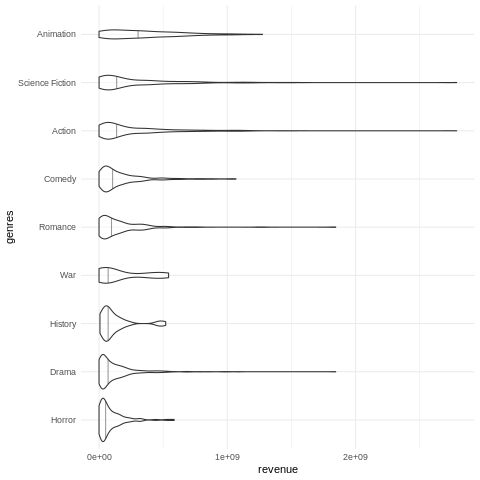

In [50]:
%%R
library(forcats)

free_genres <- movies %>%
  unnest(genres) %>%
  group_by(genres) %>%
  mutate(median_revenue = median(revenue, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(genres = fct_reorder(genres, median_revenue))

free_genres %>%
  ggplot(aes(x = revenue, y = genres)) +
  geom_violin(draw_quantiles = 0.5, alpha = 0.5) +
  theme_minimal()


<div class="alert alert-info" style="color:black">

### Question 3.3
rubric={viz:1,accuracy:2,reasoning:2}

<h4>Python</h4>
<ol type="1">
<li>Copy the code from you boxplot above and use the same strategy as for the histograms to repeat this boxplot for all numerical values. Make sure to set the x-axis scale to not include 0 unless necessary, so that the <code>runtime</code> boxpot uses the available space well (you don't need to sort the y-axis by different columns, it is better that categories are sorted by median revenue in all facets so that we don't have to keep track of how they move around between subplots).</li>
<li>Study the boxplots you just created and reflect over what you see. Identify a research oriented question that you would be interested in exploring and briefly motivate why you think this would be interesting (&lt;90 words, it can be a general question, does not have to relate to Bestflix). This is an open ended question because EDA is often open ended. And even when you go in with one particular hypotheses, you must stay open to what the data tells you and be able to detect interesting relationships that you did not foresee ahead of time.</li>
</ol>

</div>

In [57]:
# YOUR ANSWER GOES HERE
genre_col = "genres" if "genres" in df_movie.columns else "genre"
boom_genres = df_movie.explode(genre_col).dropna(subset=[genre_col])

numeric_cols = [c for c in boom_genres.select_dtypes(include="number").columns if c != "id"]

genres_by_revenue = (
    boom_genres.dropna(subset=["revenue"])
    .groupby(genre_col)["revenue"]
    .median()
    .sort_values()
    .index
    .tolist()
)

alt.Chart(boom_genres).mark_boxplot().encode(
    x=alt.X(alt.repeat("repeat"), type="quantitative", scale=alt.Scale(zero=False)),
    y=alt.Y(f"{genre_col}:N", sort=genres_by_revenue),
    tooltip=["title:N", f"{genre_col}:N"]
).properties(
    width=260,
    height=250
).repeat(
    repeat=numeric_cols,
    columns=2
).resolve_scale(
    x="independent"
)


alt.RepeatChart(...)

YOUR ANSWER to #2 GOES HERE

<div class="alert alert-success" style="color:black">

### Question 3.4
rubric={viz:1,accuracy:2}
    
<p>Don't give up soldier, you're almost done with this lab! Bestflix future rests with you.</p>
    
<h4>R</h4>
<ol type="1">
<li>Copy the code from your violinplot above and use the same faceting strategy as for the histograms to repeat this violinplot for all numerical values (you don't need to sort the y-axis by different columns, it is better that categories are sorted by median revenue in all facets so that we don't have to keep track of how they move around between subplots).
<ul>
<li>In contrast to the histograms you will here need to save the genres and medium_income columns by using the <code>!</code> syntax in your call to <code>pivot_longer</code>, see the <a href="https://tidyr.tidyverse.org/reference/pivot_longer.html">example in the manual for how to do this</a>.</li>
<li>You will also need to define both x and y in your <code>aes()</code>, just like in the single violinplot you made above.</li>
</ul></li>
</ol>

</div>

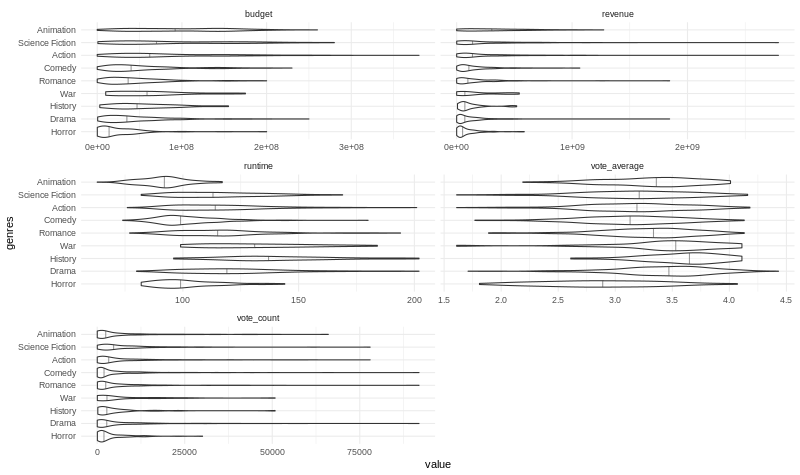

In [59]:
%%R -w 800 -h 475
# YOUR ANSWER HERE
free_genres %>%
  select(genres, median_revenue, where(is.numeric)) %>%
  select(-id) %>%
  pivot_longer(cols = !c(genres, median_revenue), names_to = "variable", values_to = "value") %>%
  ggplot(aes(x = value, y = genres)) +
  geom_violin(draw_quantiles = 0.5, alpha = 0.5) +
  facet_wrap(~ variable, ncol = 2, scales = "free_x") +
  theme_minimal()

<div class="alert alert-warning" style="color:black">

### Question 3.5 (Optional)
rubric={viz:0.5,accuracy:0.5}

<h4>Python</h4>
<p>Remember that boxplots hide how many observations there are in each group, so you would need to check this manually. Before coding this answer, glance at your plot above again and reflect for yourself: which do you think is the biggest and smallest category and how many observations does there appear to be in each? Can you tell at all?</p>
<p>Now let’s find out the answers to those questions. Make a barplot with the counts on the x-axis and the genres on the y-axis sorted after count and with the biggest bar closest to the x-axis.</p>

</div>

In [26]:
# YOUR ANSWER GOES HERE

<div class="alert alert-warning" style="color:black">

### Question 3.6 (Optional)
rubric={accuracy:0.5,reasoning:0.5}
    
<h4>R</h4>
<ol type="1">
<li>Copy over the code from the faceted violinplots above.</li>
<li>In contrast to boxplots, violinplots can show an indication of counts by scaling their area based on the number of observations instead of keeping it the same in all violins. Read the violin plot documentation and find the variable that controls the scaling of the area and change it so that the violins indicate the count of the observations.</li>
<li>Compare this to the approach we used in Altair for a boxplot + a barplot for counts, which approach do you think is clearer for getting a feeling for the number of observation in each group and why?</li>
</ol>

</div>

In [27]:
%%R -w 800 -h 475
# YOUR ANSWER GOES HERE

NULL


<div class="alert alert-warning" style="color:black">

### Question 3.7 (Optional)
rubric={accuracy:0.5,reasoning:0.5}

<h4>R or Python</h4>
<p>Let’s see how the numerical columns vary with different production studios.</p>
<ol type="1">
<li>Create a new dataframe from exploding/unnesting the <code>studios</code> column in the <code>movies</code> dataframe. You can use my code from above to guide you.</li>
<li>Create a similar sorting list as before, but this time with the studies sorted by median revenue.</li>
<li>Create the same repeated boxplots for the studios. A tip when you are creating similar plots for two different sections of your notebook, is to use a different color for each so that it is easy to orient yourself (unless you are encoding color as a visual aesthetic of course, but we’re not doing that here). Pick any HTML color either via its hex code or by choosing a name from <a href="https://stackoverflow.com/a/37232759/2166823">this list of named colors</a>. Color all the bars and boxes in this color by setting it inside <code>mark_boxplot()</code> / <code>geom_boxplot()</code>.</li>
<li>Create the same barplot of counts as above for the studios. Color the bars in the same colors as the boxplots.</li>
<li>Reflect on the information in the boxplot and / or the barplot. Identify two interesting relationships / questions / discoveries that stand out to you and that you would want to explore further. Briefly motivate why (&lt;90 words).</li>
</ol>

</div>

In [28]:
# YOUR ANSWER GOES HERE FOR THE REPEATED BOXPLOT

In [29]:
# YOUR ANSWER GOES HERE FOR THE BAR PLOT OF COUNTS

YOUR ANSWER to #5 GOES HERE

# 4. EDA of categorical columns

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={viz:1,accuracy:1,reasoning:1}
    
<h4>Python</h4>
<p>As the final step of our EDA, let’s evaluate if studios preferentially produce some movie genres over others.</p>
<ol type="1">
<li>Explode both the <code>'studio'</code> and the <code>'genres'</code> columns via method chaining. We need both since we are counting the combinations.</li>
<li>Encode the x and y axis with the genres and studios, respectively. Map the count to color and size and plot with a mark of your choice.</li>
<li>In a new cell, switch to use <code>mark_rect()</code> and encode only color as the count.</li>
<li>Which of the plots in 2 and 3 do you think gives you the clearest understanding of how the distribution of genres within each studio?</li>
</ol>

</div>

In [62]:
# YOUR ANSWER GOES HERE


genre_col = "genres" if "genres" in df_movie.columns else "genre"
studio_col = "studio" if "studio" in df_movie.columns else "studios"
#print(genre_col)
# print(studio_col)
combo = df_movie.explode(studio_col).explode(genre_col).dropna(subset=[studio_col, genre_col])

combo_counts = (
    combo.groupby([studio_col, genre_col])
    .size()
    .reset_index(name="count")
)

bubble = alt.Chart(combo_counts).mark_circle().encode(
    x=alt.X(f"{genre_col}:N"),
    y=alt.Y(f"{studio_col}:N"),
    size=alt.Size("count:Q"),
    color=alt.Color("count:Q"),
    tooltip=[f"{studio_col}:N", f"{genre_col}:N", "count:Q"]
).properties(width=700, height=500)

heat = alt.Chart(combo_counts).mark_rect().encode(
    x=alt.X(f"{genre_col}:N"),
    y=alt.Y(f"{studio_col}:N"),
    color=alt.Color("count:Q"),
    tooltip=[f"{studio_col}:N", f"{genre_col}:N", "count:Q"]
).properties(width=700, height=500)

display(bubble)
display(heat)



alt.Chart(...)

alt.Chart(...)

<div class="alert alert-info" style="color:black">

### Question 4.2
rubric={viz:1,accuracy:1}
    
<ol type="1">
<li>Go through the <a href="http://ggobi.github.io/ggally/articles/ggally_plots.html">GGally example plots</a> and find a plot that you think is suitable for showing the count of the combination of categorical variables. Use this plot to visualize the counts.</li>
<li>Create another plot of the counts by first using <code>add_count()</code> to add a count for all the combinations of genres and studios. This column will be called <code>n</code> and you can map it to an appropriate aesthetics encoding and visualize the results with <code>geom_tile</code> to create a heatmap of counts.</li>
</ol>
    
</div>

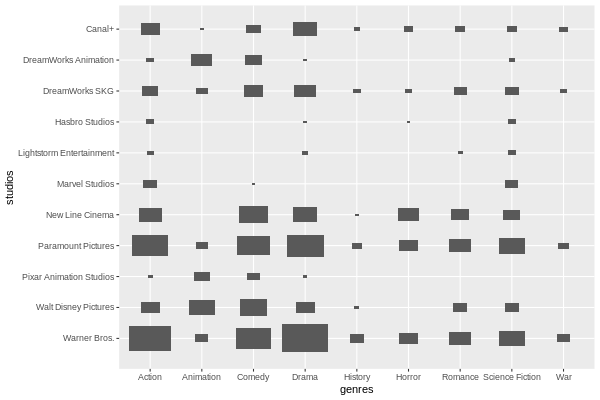

In [63]:
%%R -w 600 -h 400
# YOUR ANSWER GOES HERE
library(GGally)

free_both <- movies %>%
  unnest(genres) %>%
  unnest(studios)

ggally_count(free_both, mapping = aes(x = genres, y = studios))


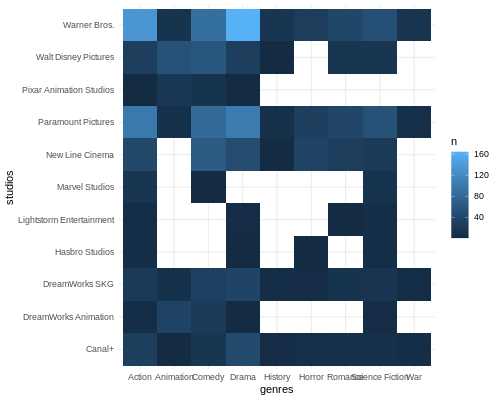

In [64]:
%%R -w 500 -h 400
free_both %>%
  add_count(studios, genres, name = "n") %>%
  ggplot(aes(x = genres, y = studios, fill = n)) +
  geom_tile() +
  theme_minimal()

<div class="alert alert-warning" style="color:black">

### Question 4.3 (Optional)
rubric={accuracy:1}

<h4>R or Python</h4>
<p>
The plots above are great for comparing absolute counts,
but that means that studios with smaller production volume gets drowned out.
Let's instead visualize the proportion within each studio for each genre.
Calculate the proportion for each studio - genre pair,
so that for each studio, the genre proportions adds up to 1.
Visualize with your favorite categorical count plot.
</p>
</div>

In [33]:
# YOUR ANSWER GOES HERE

Excellent work!! We're proud of your efforts to get Bestflix off the ground
and will be in contact when we launch our next project: Bestify.

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Convert your notebook to .html format using the `convert_notebook()` function below or by `File -> Export Notebook As... -> Export Notebook to HTML`
3. Run the code `submit()` below to go through an interactive submission process to Canvas.
4. Don't forget to also push your work to GitHub.

In [65]:
from canvasutils.submit import submit, convert_notebook

# Uncomment and run if you want to automatically convert your notebook
# convert_notebook("lab2.ipynb")

# Uncomment and run when ready to submit to Canvas
# submit(course_code=53664, token=False)

ModuleNotFoundError: No module named 'canvasutils'

---

# Help us improve the labs

I moved this section here so that it easier to fill out than going to the separate readme file.

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Were there any questions that you particularly liked or disliked?

#Ans: [Questions you liked]

#Ans: [Questions you disliked]